# Introduction to Bayes Models

### Data Science 350
### Stephen Elston

## Introduction

Modern Baysian models are in the class of compuationally intensive models. Bayesian models are a rich class of models, which can provide attractive alternatives to frequentist models. 

![**A Baysian would win this bet**](img/Sun.png)
**A Baysian would win this bet**

## Brief history

A restricted version of Bayes Theorem was proposed by Rev.Thomas Bayes (1702-1761). Bayes Theorem, was published postumously by his friend Richard Price. Bayes' interest was in probabilities of gambling games. He was also a supporter of Isac Newton's new theory of calculus, with his publication, *An Introduction to the Doctrine of Fluxions, and a Defence of the Mathematicians Against the Objections of the Author of The Analyst*.

![](img/ThomasBayes.gif)

Pierre-Simon Laplace published a version of Bayes Theorem, similar to its modern form, in his Essai philosophique sur les probabilités 1814. Laplace applied Baysian methods to problems in celestial mechanics. These problems had great practical implicatons in the late 18th and early 19th centuries for the safe navigaton of ships. 
 
![](img/Laplace.jpg)

The geophysicist and mathemtician Harold Jefferys extensively used Bayes' methods. His 1939 book, *The Theory of Probability* was in deliberate opposition to Fisher's methods using p-values.

![](img/JeffreysProbability.jpg)


Dispite the philosophical squables, Baysian methods endured and showed an increasing number of success stories. Pragmatists continued to use both approaches. A number of success during the Second World War, with the philosophical battles raging, included:

- Bayesian models were used to improve artillery accuracy in both world wars. In particular the Soviet statistian Kolmagorov used Bayes methods to greatly improve artillery accuracy. 
- Bayesian models were used by Alan Turing to break German codes.
- Bernard Koopman, working for the British Royal Navy, improved the ability to locate U-boats using directional data from intercepted radio transmissions. 


Starting in the second half of the 20th century the convergance of greater computing power and general acceptance lead to the following notable advances in computational Baysian methods.

- Statistical sampling using Monte Carlo methods; Stanislaw Ulam, John von Neuman; 1946, 1947
- MCMC, or Markov Chain Monte Carlo; Metropolis et al. (1953) Journal of Chemical Physics
- Hastings (1970), Monte Carlo sampling methods using Markov chains and their application
- Geman and Geman (1984) Stochastic relaxation, Gibbs distributions and the Bayesian restoration of images
- Duane, Kennedy, Pendleton, and Roweth (1987),  Hamiltonian MCMC
- Gelfand and Smith (1990), Sampling-based approaches to calculating marginal densities.



## Baysian vs. Frequentist Views

The battle between Fisher, Jefferys and their protégés continued for most of the 20th century. This battle was bitter and often personal. The core of these argument were:

- Fisher argued that the selection of a Bayesian prior distribution was purely subjective, allowing one to achieve any answer desired.
- Jefferys argued that all knowledge is in fact subjective, and that choosing a confidence interval was subjective in any event.

With greater compuational power and general acceptance, Bayes methods are now widely used in areas ranging from medical research to natural language understanding to web search. Amoung pragmatists, the common belief today is that some problems are better handled by Frequentist methods and some with Bayesian methods.

Let's summarize the differences between the Baysian and Frequentist views. 

- Bayesian methods use priors to quantify what we know about parameters.
- Frequentists do not quantify anything about the parameters, using p-values and confidence intervals to express the unknowns about parameters.

Recalling that both views are useful, we can contrast these methods with a chart.

![](img/FrequentistBayes.jpg)

## References

### Some introductory texts

These two books provide a broad and readable introduction to Baysian data analysis. Well, sort of. Both books contain extensive examples using R and specialized Bayes packages.

![](img/StatisticalRethinking.jpg)

![](img/DoingBaysianDataAnalysis.jpg)

### Modeling reference

This book contains a comprehensive treatment of applying Baysian models. The level of treatments in intermediate. The examples are from the social sciences, but the methods can be applied more widely. The examples use R and specialized Bayes packages. 

![](img/BayesRegression.jpg)

### Theory 

This book contains a comprehensive overview of the modern theory of Bayesian models. The book is at an advanced level. Only theory is addressed, which only very limited R code examples.  

![](img/BaysianDataAnalysis.jpg)

## Bayes Theorm

Let's go through a simple derivation of Baye's theorm. Remember the rule for conditional probability:

$$P(A|B) = \frac{P(A \cap B)}{p(B)}\\
and\\
P(B|A) = \frac{P(A \cap B)}{p(A)}$$

Eliminating $P(A \cap B):$

$$ P(B)P(A|B) = P(A)P(B|A) \\
Or\\
P(A|B) = \frac{P(A)P(B|A)}{P(B)}$$

Which is Bayes' Theorm!

### Example, probabilities of eye and hair color

A sample population has the following probabilities of eye and hair color combinations. Execute thhe code to see the chart of conditional probabilities.

In [30]:
eyeHair = data.frame(Black = c(0.11, 0.03, 0.03, 0.01), 
                     Brunette = c(0.2, 0.14, 0.09, 0.05),
                     Red = c(0.04, 0.03, 0.02, 0.02),
                     Blond = c(0.01, 0.16, 0.02, 0.03))
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green')
eyeHair

,Black,Brunette,Red,Blond
Brown,0.11,0.20,0.04,0.01
Blue,0.03,0.14,0.03,0.16
Hazel,0.03,0.09,0.02,0.02
Green,0.01,0.05,0.02,0.03


The figure in the table above are the **conditional probabilities**. Note that in the case: 

$$P(hair|eye) = P(eye|hair)$$ 

Given these conditional probabilities, it is easy to compute the marginal probabilities by summing the probabilities in the rows and columns. The **Marginal probability** is the probability along one variable (one margin) of the distribution. For example, $P(Red)$ or $P(Green)$. Like all probability distributions, marginal distributions must sum to 1.0. 

The code in the cell below computes the marginal probabilities by both hair color and eye color. Execute this code and examine the result.

In [31]:
## Compute the marginal distribution of hair color and eye color
eyeHair = rbind(eyeHair, apply(eyeHair, 2, sum))
eyeHair$Marginal_eye = apply(eyeHair, 1, sum)
row.names(eyeHair) = c('Brown', 'Blue', 'Hazel', 'Green', 'Marginal_hair')
eyeHair

,Black,Brunette,Red,Blond,Marginal_eye
Brown,0.11,0.20,0.04,0.01,0.36
Blue,0.03,0.14,0.03,0.16,0.36
Hazel,0.03,0.09,0.02,0.02,0.16
Green,0.01,0.05,0.02,0.03,0.11
Marginal_hair,0.18,0.48,0.11,0.22,0.99


**Your Turn:** Use Bayes Theorm to compute the probability of each hair color given that the subject has blue eyes; $P(Hair\ Color|Blue\ Eyes)$. Hint, this is a bit tricky since $P(hair\ color) = 1$ across all colors. 

In [32]:
eyeHair[2, 1:4]/sum(eyeHair[2, 1:4])

,Black,Brunette,Red,Blond
Blue,0.08333333,0.3888889,0.08333333,0.4444444


## Applying Bayes Theorm

We need a formulation of Bayes Theorm which is convienient to use for compuational problems. Specifically, we don't want to be stuck summing all of the possiblilites to compute $P(B)$. 

Look at some fun facts about conditional probabilities. 

$$
𝑃(𝐵 \cap A) = 𝑃(𝐵|𝐴)𝑃(𝐴) \\
And \\
𝑃(𝐵)=𝑃(𝐵 \cap 𝐴)+𝑃(𝐵 \cap \bar{𝐴}) \\
Then \\
𝑃(𝐵)=𝑃(𝐵|𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴}) \\
where \\
\bar{A} = Not\ A
$$

We can now rewrite Bayes Theorm:

$$ P(A|B) = \frac{P(A)P(B|A)}{𝑃(𝐵│𝐴)𝑃(𝐴)+𝑃(𝐵│ \bar{𝐴})𝑃(\bar{𝐴})} \\ $$

This is a bit of a mess. But fortunately, we don't always need the denominator. We can rewrite Bayes Theorem as:

$$𝑃(𝐴│𝐵)=𝑘∙𝑃(𝐵|𝐴)𝑃(𝐴)$$

Ignoring the normalizaton constant $k$, we get:

$$𝑃(𝐴│𝐵) \propto 𝑃(𝐵|𝐴)𝑃(𝐴)$$

### Applying the simplifed relationship Bayes Theorm

How to we interpret the relationships shown above? We do this as follows:

$$Posterior\ Distribution \propto Likelihood \bullet Prior\ Distribution \\
Or\\
𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠│𝑑𝑎𝑡𝑎) \propto 𝑃(𝑑𝑎𝑡𝑎|𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠)𝑃(𝑝𝑎𝑟𝑎𝑚𝑒𝑡𝑒𝑟𝑠) $$

These relationships apply to the observed data distributions, or to parameters in a model (partial slopes, intercept, error distributions, lasso constant,…). 

### Creating Bayes models

Given prior assumptions about the behavior of the parameters (the prior), produce a model which tells us the probability of observing our data, to compute new probability of our parameters. Given this, the steps for working with a 

- Identify data relevant to the research question. E.g.: what are the measurement scales of the data?
- Define a descriptive model for the data. For example, pick a linear model formula.
- Specify a prior distribution of the parameters. For example, we think the error in the linear model is Normally distributed as $N(\theta,\sigma^2)$.
- Use the Bayesian inference formula (above) to compute posterior parameter probabilities.
- Update if more data is observed. This is key! The posterior of a Baysian model naturally updates as more data is added, a form of learning.
- Simulate data values from realizationns of the poterior distrion of the parameters.


### How do we choose a prior?

The choice of the prior is a serious problem when performing Bayesian analysis. In general, a prior must be convincing to a **sceptical audience**. Some possible approches include:

- Prior observations
- Domain knowledge
- If poor knowledge use less informative prior
- **Watch out:** A uniform prior is informative. For exampe, you must set the limits on range of values
 
One analytically and compuationally simple choice is a **conjugate prior**. When a likelihood is multiplied by a conjugate prior the distribution of the postirior is the same as the likelihood. Most named distributions have conjugates. A few commonly used examples are shown in the table below:

Likelihood | Conjugate
---|---
Binomial|Beta
Bernoulli|Beta
Poisson|Gamma
Categorical|Dirichlet
Normal| Normal, Inverse Gamma

However, there are many practical cases where a conjugate prior is not used.

## First Example

Let's try a first example. 

With a bit of theory in mind, let's pull things together with an example. Let's say we are interested in analyzing districated drivers. We sample the behavior of 10 drivers at an intersection and determine if they exhibit distracted driving or not. The data are binomially distributed, a driver is distracted or not. In the example we will:

- Select a prior for the parameter $p$, the probability of distracted driving.
- Using data, compute the likelihood.
- Compute the posterior and posterior distributions. 
- Try another prior distribution.
- Add more data to our data set to updated the posterior distribution.

The likelihood of the data and the posterior distribution are binomially distributed. The Binomial distribution has one parameter we need to estimate, $p$, the probability. We can write this formally for $k$ successes in $N$ trials:

$$ P(A) = \binom{N}{k} \cdot p^k(1-p)^{N-k}$$

The code in the cell below creates a simple data set of distracted drivers and computes some simple summary satistics. Execute this code. 

In [33]:
drivers = c('yes','no','yes','no','no',
          'yes','no','no','no','yes')
distracted = ifelse(drivers == 'yes', 1, 0) # Convert to binary
N = length(distracted)                  # sample size
nDistracted = sum(distracted == 1)      # number of distracted drivers
nNot = sum(distracted == 0)             # number not distracted
cat(' Distracted drivers = ', nDistracted, 'Attentive drivers = ', nNot, 
    '\n', 'Probability of distracted driving =', nDistracted / (nDistracted + nNot))

 Distracted drivers =  4 Attentive drivers =  6 
 Probability of distracted driving = 0.4

Let's test a prior distribution for our one model parameter $p$, $P(p)$. We don't know a lot about these drivers at this point, so we will start with a Uniform distribution. 

The code in the cell below computes and plots the uniform prior distribution. Execute this code and examine the results. 

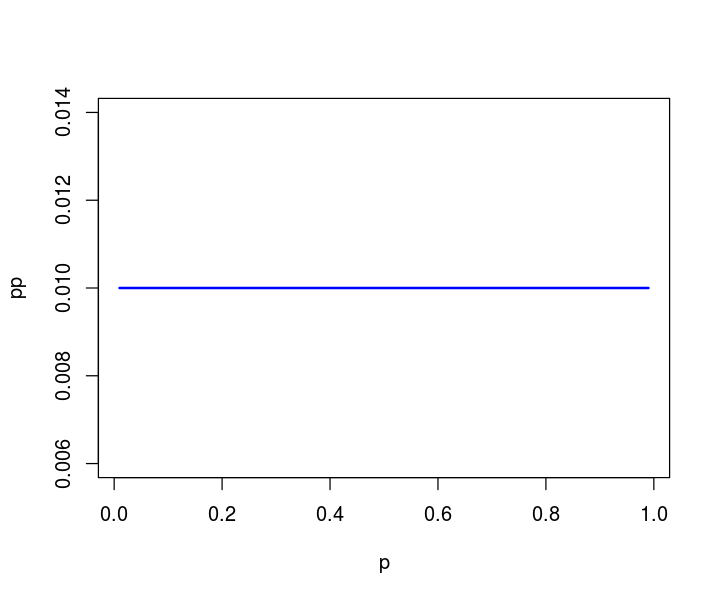

In [34]:
require(repr)
options(repr.plot.width=6, repr.plot.height=5) ## Set the plot area

N = 100
p = seq(0.01, 0.99, length = N) 
pp = rep(1/N, length = N)
plot(p, pp, typ = 'l', lwd = 2, col = 'blue')

Next, we need to compute the likelihood. The likelihood is the probability of the data given the parameter, $P(X|p)$. We can view the observation of each driver as distracted or not as a Bernoulli trial, so we will use the Binomial distribution. 

The code in the cell below computes and plots the Binomial likelihood for the distracted driver data. This caluculation is performed for each value of $p$ we are  sampling. Execute this code and examine the results.

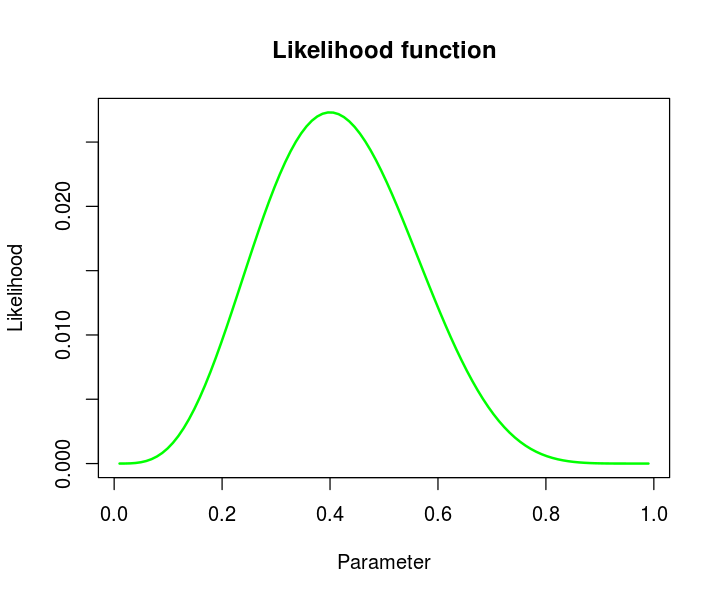

In [35]:
likelihood = function(p, dat){
    k = sum(dat)
    N = length(dat)
    l = choose(N, k) * p^k * (1-p)^(N - k) # Compute Binomial likelihood
    l / sum(l) # Normalize and return
}
l = likelihood(p, distracted)
plot(p, l, , typ = 'l', lwd = 2, col = 'green', 
     ylab = 'Likelihood', xlab = 'Parameter',
     main = 'Likelihood function')

Now that we have a prior and a likelihood we are in a position to compute the posterior distribution of the parameter $p$, $P(p|X)$. The code in the cell below computes and plots the posterior, given the prior and likelihood.

***
**Warning!** The compuational methods used in this notebook are simplified for the purpose of illustration. For real-world problems, compuationally efficient code must be used!
***

 Maximum of prior density = 0.01 
 Maximum likelihood = 0.396 
 MAP = 0.396

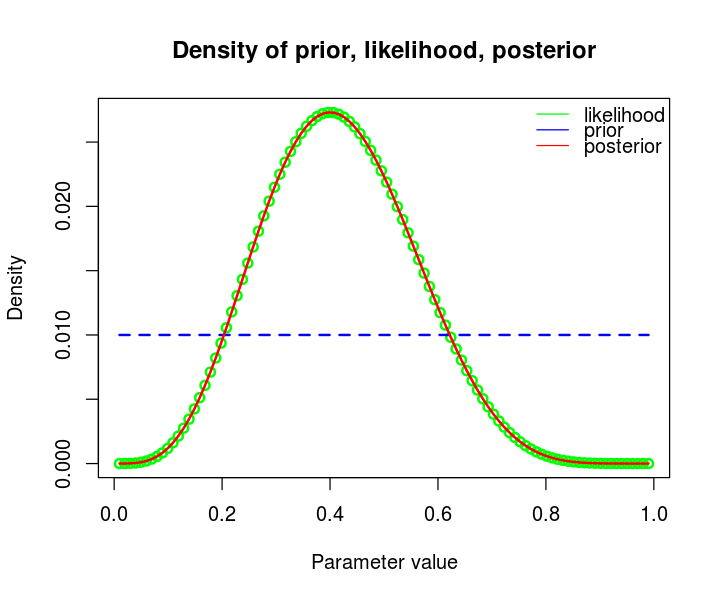

In [36]:
posterior = function(prior, like){
    post = prior * like  # Compute the product of the probabilities
    post / sum(post) # Normalize and return
}

plot.post = function(prior, like, post, x){
    maxy = max(c(prior, like, post))
    plot(x, like, , lty = 1, ylim = c(0.0, maxy), 
         ylab = 'Density', xlab = 'Parameter value',
         main = 'Density of prior, likelihood, posterior',
         lwd = 2, col = 'green')
    lines(x, prior, lty = 2, lwd = 2, col = 'blue')    
    lines(x, post, lty = 1, lwd = 2, col = 'red')
    legend('topright', c('likelihood', 'prior', 'posterior'), 
    lty=1, col=c('green', 'blue', 'red'), bty='n', cex=1.0)
    
    cat(' Maximum of prior density =', round(x[which.max(prior)], 3), '\n',
        'Maximum likelihood =', round(x[which.max(like)], 3), '\n',
         'MAP =', round(x[which.max(post)], 3))
}
post = posterior(pp, l)
plot.post(pp, l, post, p)

Notice that with Uniform prior distribution, the posterior is just the likelihood. This is an important observation. The key point is that the frequentist probabilities are identical to the Bayesian posterior distribution given a Uniform prior.  

### Another prior

Let's try another prior distribution. We will chose the **conjugate prior** of the Binomial distribution which is the Beta distribution. Formally, we can write the Beta distribution:

$$Beta(p |a, b) = \kappa x^{a-1}(1 - x)^{b-1} \\
where,\ \kappa = normalization\ constant$$

The Beta distribution is define on the interval $0 \le Beta(p|a,b) \le 1$. The Beta distribution has two parameters, $a$ and $b$, which determine the shape. To get a feel for the Beta distribution, exectute the code in the cell below which computes 100 examples on a 10x10 grid. 

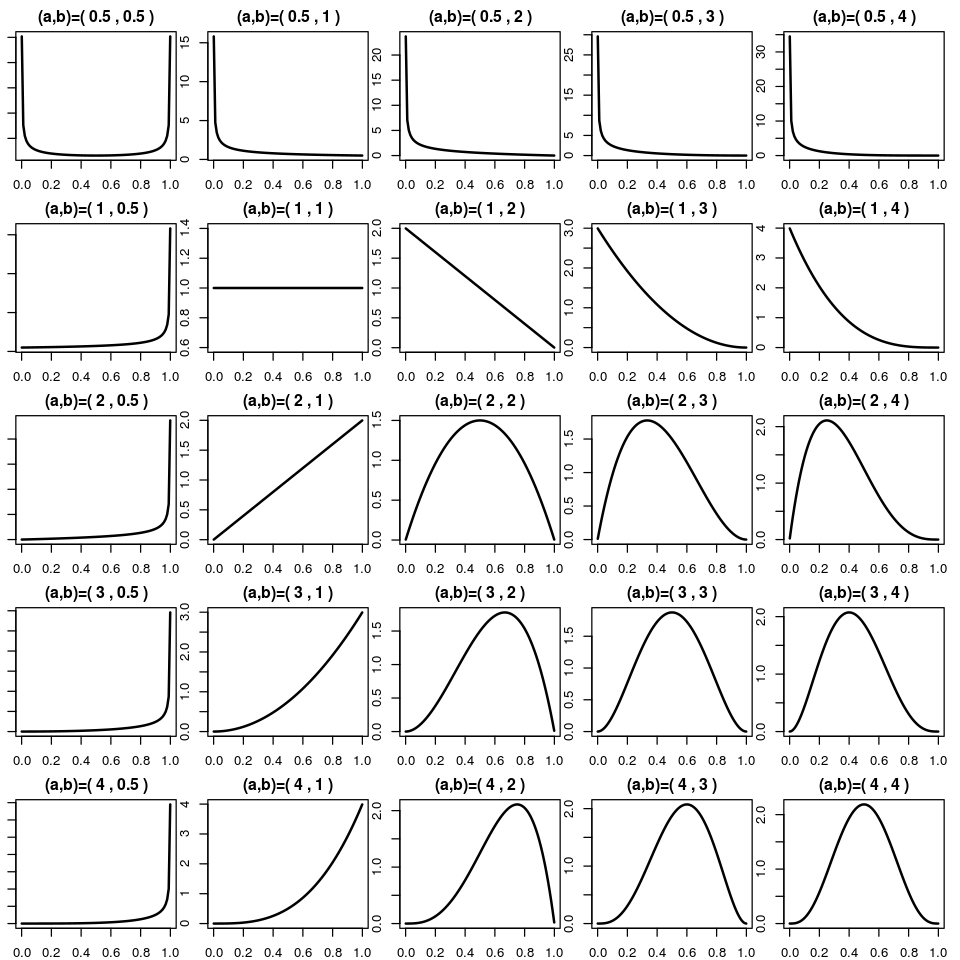

In [37]:
options(repr.plot.width=8, repr.plot.height=8) ## Set the plot area

alpha = c(0.5,1,2,3,4)
beta = alpha
x = seq(0.001,0.999,length=100)

par(mfrow = c(5,5), mar=c(2,1,2,1)) # mar = c(bottom, left, top, right)
invisible(sapply(alpha, function(a){
  sapply(beta, function(b){
    plot_title = paste("(a,b)=(",a,",",b,")")
    plot(x,dbeta(x,a,b),xlab="",ylab="",
         main=plot_title, type="l", lwd=2)
  })
}))

# Set plot options back to normal
par(mar=c(5.1,4.1,4.1,2.1), mfrow=c(1,1))
options(repr.plot.width=6, repr.plot.height=5) ## Set the plot area

You can see from the plots above, that the Beta distribution can take on quite a range of shapes, depending on the parameters. Generally if $a \gt b$ the distribution skews to the rights, if $a \lt b$ to the left, and symetric if $ a = b$.

We still do not know a lot about the behavior of drivers, so we will pick a rather vague or broad Beta distribution as our prior. The code in the cell below uses a symetric prior with $a = 2$ and $b = 2$. Execute this code and examine the result. 

 Maximum of prior density = 0.495 
 Maximum likelihood = 0.396 
 MAP = 0.416

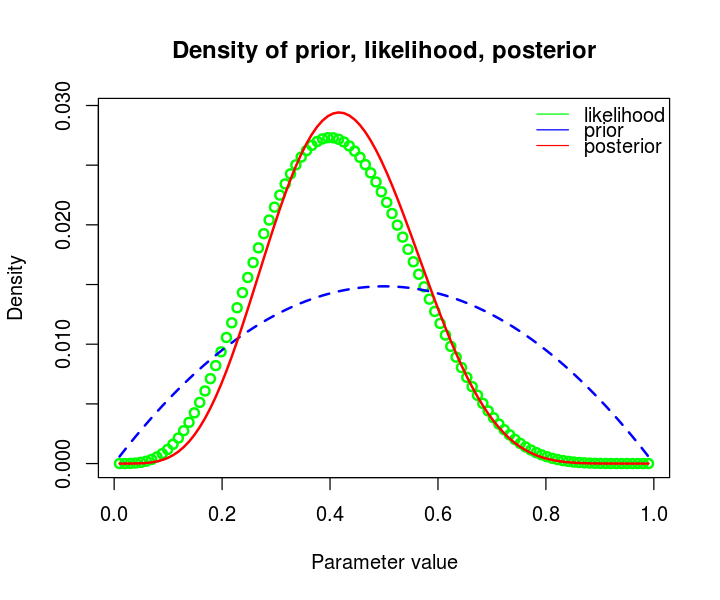

In [38]:
beta.prior = function(x, a, b){
    l = dbeta(x,a,b) # Compute Binomial likelihood
    l / sum(l) # Normalize and return
}
pp = beta.prior(p, 2, 2)

post = posterior(pp, l)
plot.post(pp, l, post, p)

Notice that the mode of the posterior is close to the mode of the likelihood, but has shifted toward the mode of the prior. We call this tendancy of Bayesian posteriors to be shifted toward the prior the **shrinkage property**. The tendancy of the maximum likelihood point of the posterior is said to shrink toward the maximum likelihood point of the prior. 

We can now see that the posterior probability of distracted driving has a rather wide spread. How can we get a more definitive understanding of the probability of distracted driving?

### Adding data to the Bayesian model

Let's say that we observe some more drivers and gather some more data on distracted driving. Additional data will narrow the spread of the posterior distribution. As you might expect, adding more obervations to the model, moves the posterior closser to the likelihood. 

In fact, as data is added to a Bayesian model, the posterior moves toward the likelihood. This property has two important implications:

- The prior matters less as more data is added to a Baysian model.
- Adding data reduces shrinkage.
- The inferences from Baysian and frequentist models tend to converge as data set sizes grow and the posterior approaches the likelihood.

**But, be careful!** With large scale problems with large numbers of parameters you may need enourmous data sets to see the convergance in behavior. 

The code in the cell below adds another 10 observations to our data set. Execute this code and examine the results. How do the likelihood and posterior distributions compare with the case with only 10 data points.

 Maximum of prior density = 0.495 
 Maximum likelihood = 0.396 
 MAP = 0.406

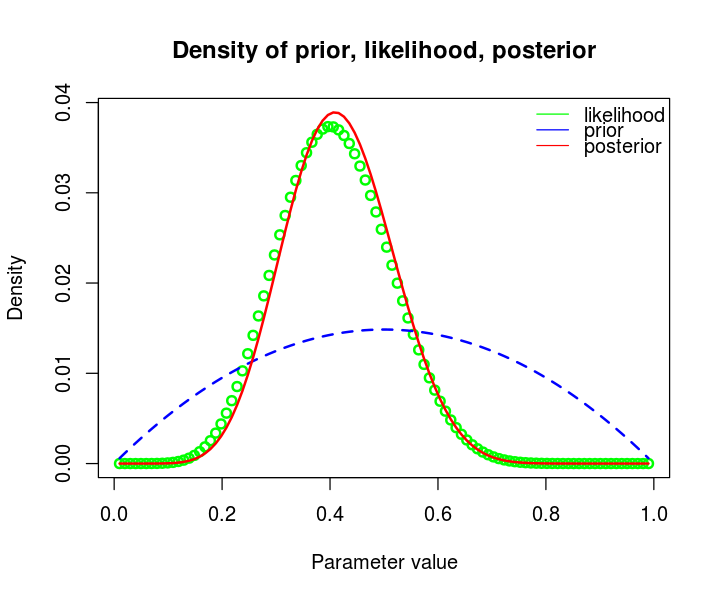

In [39]:
new.distracted = c('no','yes','no','no','no',
          'yes','no','yes','no','no')  # Some new data
new.distracted = ifelse(drivers == 'yes', 1, 0) # Convert to binary
l = likelihood(p, c(distracted, new.distracted))
post = posterior(pp, l)
plot.post(pp, l, post, p)

## Credible Intervals

A **credible interval** is an interval on the Baysian posterior distribution. The credible interval is sometime called the highest density interval (HDI), or highest posterior density interval (HPI). As an example, the 90% credible interval encompases the 90% of the posterior distribution with the highest probability desnsity.  

The credible interval is the Baysian analog of the frequentist confidence interval. However, these two measures are conceptually different. The confidence interval is chosen on the distribution of a test statistic, whereas the credible interval is computed on the posterior distribution of the parameter. For symetric distributions the credible interval can be numerically the same as the confidence interval. However, in the general case, these two quantities can be quite different.  

The code in the cell below, plots the posterior distribution of the parameter of the binomial distribution parameter  pp . The 95% credible interval, or HDI, is also computed and displayed. Execute this code and examine the result. 

***
**Warning!** This code assumes a symetric prior distribution, so will not work in the general case. 
***

The 0.95 Credible interval is 0.24 to 0.61

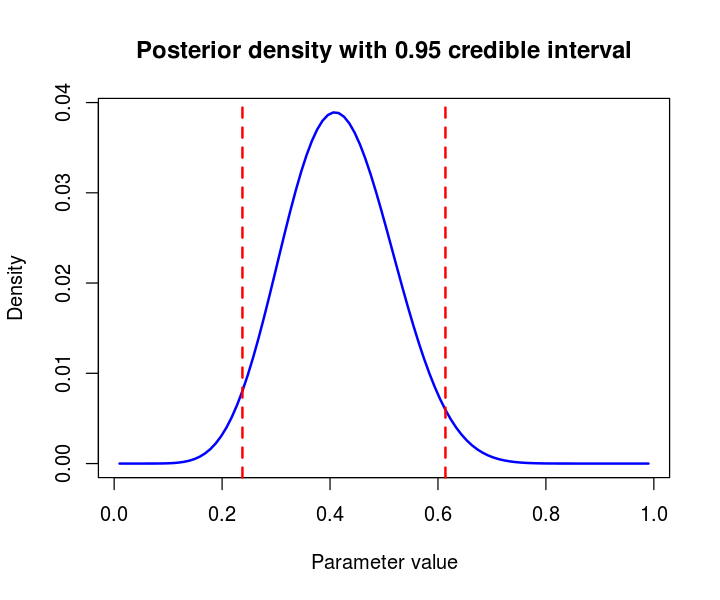

In [40]:
nSamps = 100000
qs = c(0.025, 0.975)

plot.ci = function(p, post, nSamps, qs){
    ## This function computes a credible interval using an assumption
    ## of symetry in the bulk of the distribution to keep the 
    ## calculation simple. 
    ## Compute a large sample by resampling with replacement
    samps = sample(p, size = nSamps, replace = TRUE, prob = post)
    ci = quantile(samps, probs = qs) # compute the quantiles
    
    ## Plot the density with the credible interval
    interval = qs[2] - qs[1]
    title = paste('Posterior density with', interval, 'credible interval')
    plot(p, post, , typ = 'l', ylab = 'Density', xlab = 'Parameter value',
         main = title, lwd = 2, col = 'blue')
    abline(v = ci[1], col = 'red', lty = 2, lwd = 2)
    abline(v = ci[2], col = 'red', lty = 2, lwd = 2)
    cat('The', interval, 'Credible interval is', 
        round(ci[1], 2), 'to', round(ci[2], 2))
    }
plot.ci(p, post, nSamps, qs)

### Simulating from the  posterior distribution: forecasting

So far, we have computed the posterior distribution of the probability parameter $p$. But what about the distribution of distracted drivers? We can compute this distribution by simulating from the posterior distribution of $p$. 

The code in the cell below simulates and plots the distribution of distracted drivers. Run this code and examine the results. 

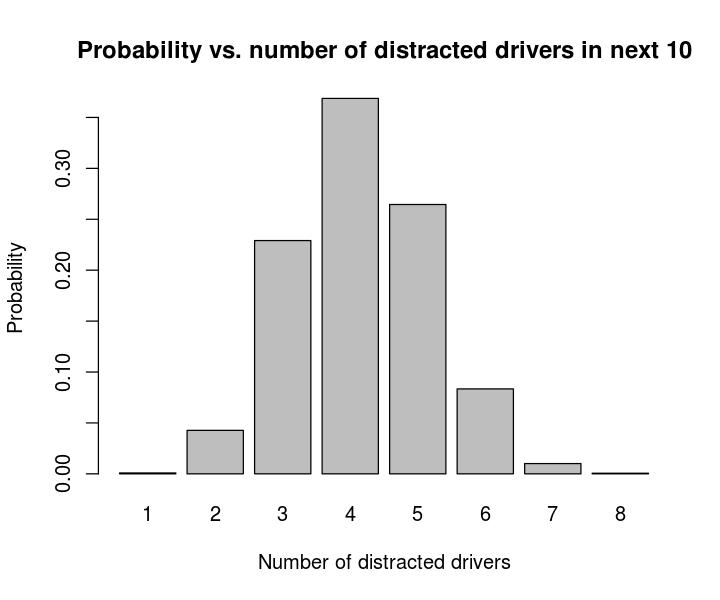

In [41]:
Num_cars = 10
nSamps = 10000

## We resample from the posterior distribution with replacecment, to get 
## a large sample of posterior probabilities. 
## Next we scale by the number of cars in our forecast to get the probability
## of each number of cars with distracted driving.
## Finally, normalize to get the probabilities by number of cars with
## distracted drivers.
samps = round(Num_cars * sample(p, size = nSamps, replace = TRUE, prob = post))
counts = table(samps) / nSamps # Normalize to get probability
#hist(samps)
barplot(counts, 
        main = paste('Probability vs. number of distracted drivers in next', 
                     as.character(Num_cars)),
        xlab = 'Number of distracted drivers', ylab = 'Probability')

## Comparing Bayesian models

How can we use Bayesian models to compare two distributions? It turns out that we can compare Bayesian models in severeal ways. In this lesson, we will compute and compare confidence intervals of the posterior distribution of a model parameter. 

For this example, we will compare the posterior distribution of the heights of sons to the heights of the mothers in the Galton Family dataset. As a first step, we will compute and evaluate Bayesian models for the mean heights using a subset of just 25 observations. 

The code in the cell below computes sub-samples the Galton family data and then plots histogram of the heights of sons and mothers. Execute this code and examine the results.

family,father,mother,midparentHeight,children,childNum,gender,childHeight
001,78.5,67.0,75.43,4,1,male,73.2
001,78.5,67.0,75.43,4,2,female,69.2
001,78.5,67.0,75.43,4,3,female,69.0
001,78.5,67.0,75.43,4,4,female,69.0
002,75.5,66.5,73.66,4,1,male,73.5
002,75.5,66.5,73.66,4,2,male,72.5


Mean of heights = 67

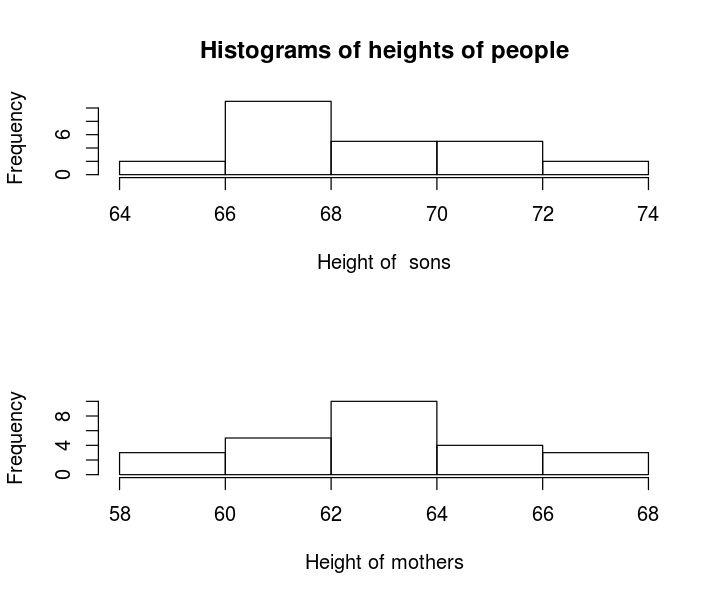

In [42]:
library(HistData)
head(GaltonFamilies)
require(dplyr)

numSamps = 25 
male = GaltonFamilies %>% filter(gender == 'male') %>% sample_n(numSamps)

par(mfrow = c(2,1))
hist(male$childHeight, main = 'Histograms of heights of people', 
     xlab = 'Height of  sons')
hist(male$mother, main = '', xlab = 'Height of mothers')
par(mfrow = c(1,1))
meanHeight = round(mean(c(male$mother, male$father, male$childHeight)))
cat('Mean of heights =', meanHeight)

To perform this analysis, we need to select a prior distribution and compute the likelihood. First, we will address the likelihood. 

For these data, we will use a Normal likelihood. For a sample $X = {x_1, x_2, \ldots, x_n}$, we can write the likelihood as:

$$
P(X | u, \sigma) = \bigg(\frac{1}{2 \pi \sigma^2} \bigg)^{\frac{n}{2}} exp \Bigg[ -\frac{1}{2 \sigma^2}  \Bigg( \sum_{i = 1}^n (x_i - \bar{x})^2 + n(\bar{x} - \mu)^2 \Bigg) \Bigg] \\
ignoring\ constants\ and\ normalization\\
\propto exp \bigg( -\frac{n(\bar{x} - \mu)^2}{2 \sigma^2} \bigg) 
$$

To simplify the compuations here, we will only estimate the posterior distribution of the mean. We will use a fixed emperical estimate of the standard deviation. A more complete analysis will also estimate the posterior distribution of the standard deviation.

 Mean = 69.028 Standard deviation = 2.46281 
 Maximum of prior density = 66.997 
 Maximum likelihood = 69.024 
 MAP = 69.009

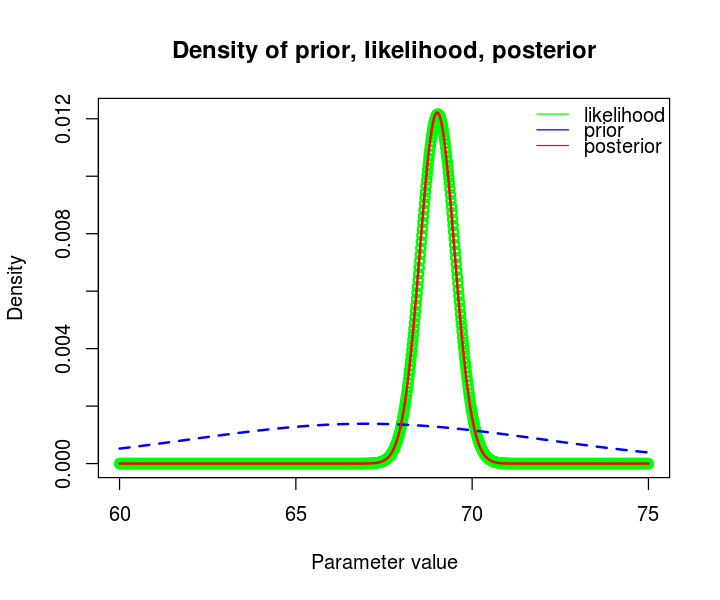

In [43]:
N = 1000 
p = seq(60.0, 75, length = N) 

male$childHeight = sort(male$childHeight, decreasing = FALSE)
pp = dnorm(p, mean = meanHeight, sd = 5) ## start with a fairly broad prior
pp = pp / sum(pp)

comp.like = function(p, x){
    l = rep(0, length = length(p))
    sigmaSqr = sd(x)^2
    xBar = mean(x)
    cat(' Mean =', xBar, 'Standard deviation =', sqrt(sigmaSqr), '\n')
    n = length(x)
#    l = sapply(p, function(u) dnorm(u, mean = xBar, sd = sigmaSqr))
    l = sapply(p, function(u) exp(- n* (xBar - u)^2 / (2 * sigmaSqr)))
    l / sum(l) # Normalize and return
}

    
like.son = comp.like(p, male$childHeight)

post.son = posterior(pp, like.son)
plot.post(pp, like.son, post.son, p)

The code in the cell below computes the posterior distribution of the heights of the mothers. Run this code and examine the results. How do these results differ from the results for the hights of the sons?

 Mean = 63.448 Standard deviation = 2.164317 
 Maximum of prior density = 66.997 
 Maximum likelihood = 63.453 
 MAP = 63.468

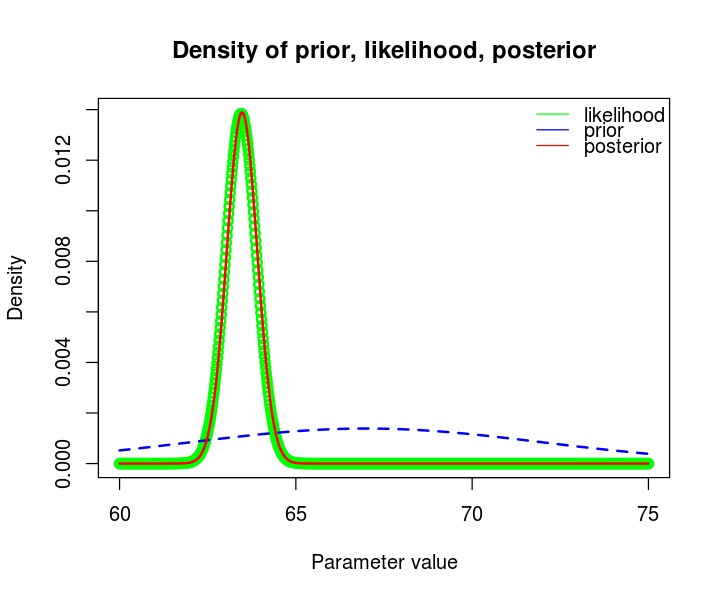

In [44]:
like.mom = comp.like(p, male$mother)

post.mom = posterior(pp, like.mom)
plot.post(pp, like.mom, post.mom, p)

To compare the posterior distributions of the mean hights of the sons to the distribution of the mean heights of the mothers, we compute and compare the confidence intervals. 

Run the code  in the cell below which computes and plots the confidence intervals for the mean heights of the sons. 

The 0.95 Credible interval is 68.05 to 69.97

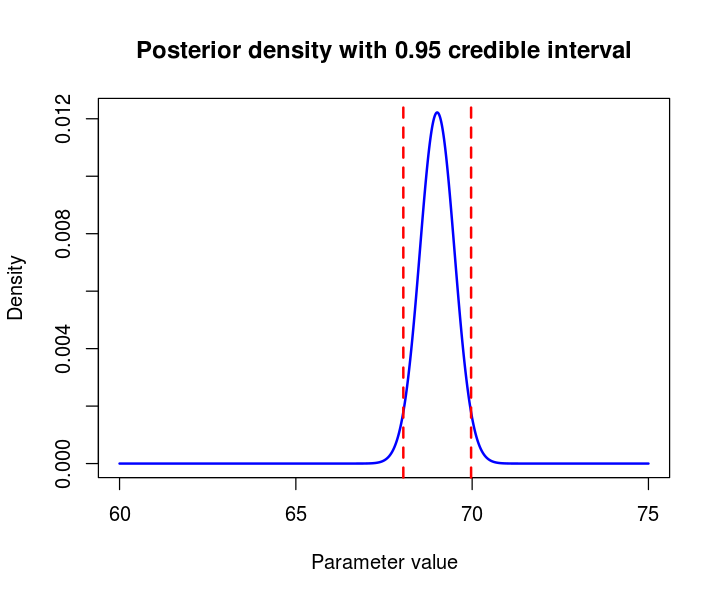

In [45]:
nSamps = 100000
qs = c(0.025, 0.975)
plot.ci(p, post.son, nSamps, qs)

Next, compute and plot the posterior distribution and CIs of the mean of the heights of the mothers.  

The 0.95 Credible interval is 62.63 to 64.32

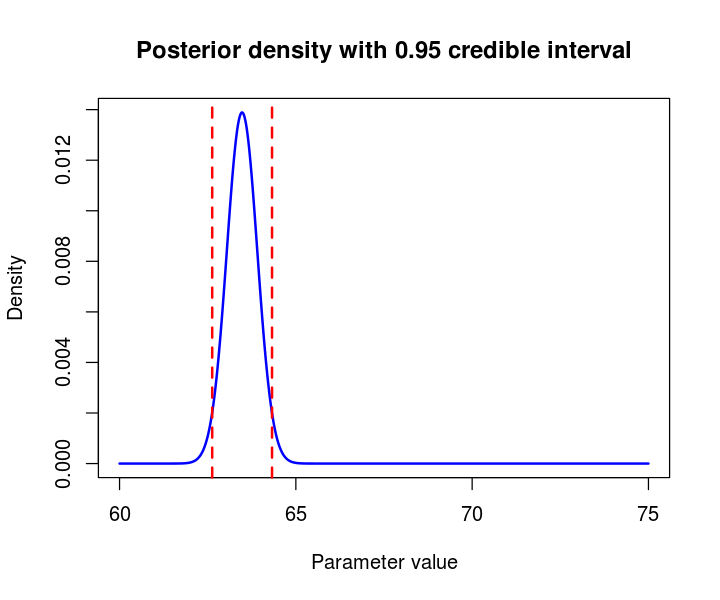

In [46]:
plot.ci(p, post.mom, nSamps, qs)

Examine the CIs for these posterior distributions. Are the distributions of the mean heights of sons and mothers significantly different?  

***
**Your turn:** Try the variations on the foregoing Bayesian analysis.

1. The foregoing Bayesian analysis was performed with just 25 data points. Rerun this analysis with with 250 data points. How do the posterior distributions computed with the 250 data points compare to those computed with 25 data points? 
2. Perform the same analysis, except comparing the distributions of heights of sons and heights of fathers. 

**Important!:** Use another variable name for the likelihood and posterior for this exercise. 
***

Mean of heights = 68 Mean = 69.4504 Standard deviation = 2.769313 
 Mean = 64.0648 Standard deviation = 2.234891 
The 0.95 Credible interval is 69.11 to 69.79The 0.95 Credible interval is 63.78 to 64.34

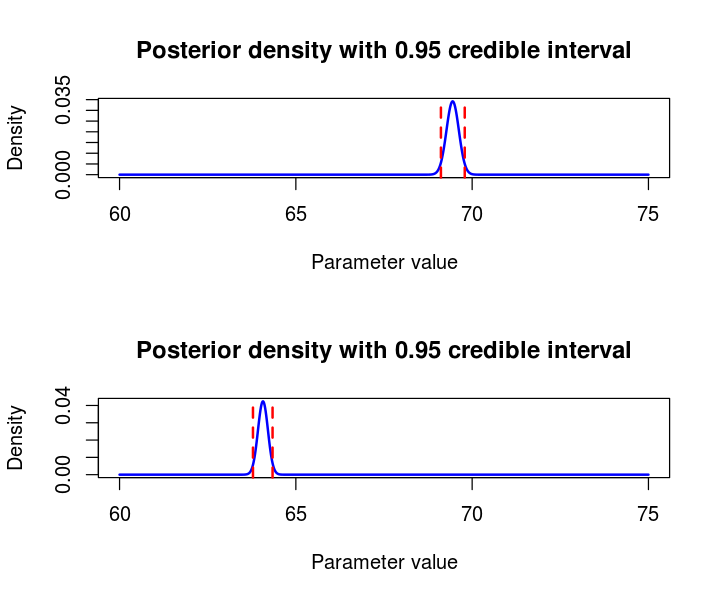

In [47]:
numSamps = 250 
male_250 = GaltonFamilies %>% filter(gender == 'male') %>% sample_n(numSamps)

 #par(mfrow = c(2,1))
# hist(male$childHeight, main = 'Histograms of heights of people', 
#     xlab = 'Height of  sons')
# hist(male$mother, main = '', xlab = 'Height of mothers')
# par(mfrow = c(1,1))
meanHeight = round(mean(c(male_250$mother, male_250$father, male_250$childHeight)))
cat('Mean of heights =', meanHeight)

like.son_250 = comp.like(p, male_250$childHeight)
post.son_250 = posterior(pp, like.son_250)

like.mom = comp.like(p, male_250$mother)
post.mom = posterior(pp, like.mom)

# plot.post(pp, like.mom, post.mom, p)

par(mfrow = c(2,1))
plot.ci(p, post.son_250, nSamps, qs)
plot.ci(p, post.mom, nSamps, qs)
par(mfrow = c(1,1))

### Simulation from the posterior distribution

Once we have a posterior distribution for parameters we can simulate from this distribution. The simulation consists of taking a number of random draws from the posterior parameter distribution and computing the posterior distribution of the data values. 

There are a number of reasons why you might want to simulate from the posterior distribution of data values.

- Test the model against the data.
- Compute forecasts of the dependent (label) variable from the model.

The code in the cell below computes the posterior distribution of the hights of sons. This is done by computing the distribution of height based on realizations of the parameter (the mean) from the posterior distribution. The density distribution of the simulated heights is ploted along with the histogram of the original data. Execute this code and examine the results.

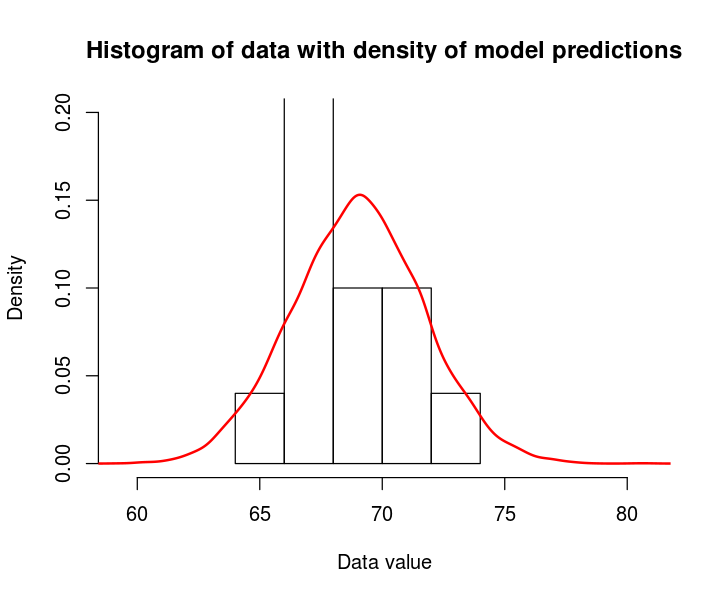

In [48]:
sim.height = function(n, sigma, p, post){
    ## Create probability weighted random same of values
    ## of the mean height.
    mu = sample(p, size = n, replace = TRUE, prob = post)
    ## Now compute the values from the likelihood
    rnorm(n, mu, sigma)
}

plot.dist = function(n, post, dat){
    minx = min(c(post, dat))
    maxx = max(c(post, dat))
    hist(dat, prob = TRUE, xlim = c(minx, maxx), ylim = c(0, 0.2),
        xlab = 'Data value', ylab = 'Density', 
        main = 'Histogram of data with density of model predictions')
    lines(density(sim.vals), col = 'red', lwd = 2)
    }

sim.vals = sim.height(10000, sigma = 2.616329, p = p, post = post.son)

plot.dist(10000, sim.vals, male$childHeight)

Examine this chart. How well does the density of the posterior value distribution match the histogram of the original data values? Does the density of the posterior value distribtion deviate from Normal? 

***
**Your turn:** Use the model you computed with 250 data values to create a plot like the one above. Examine these results and compare them to the results obtained with the model created with only 25 data values. Which posterior density function appears to represent the data better and why? Does the density deviate from Normal?
***

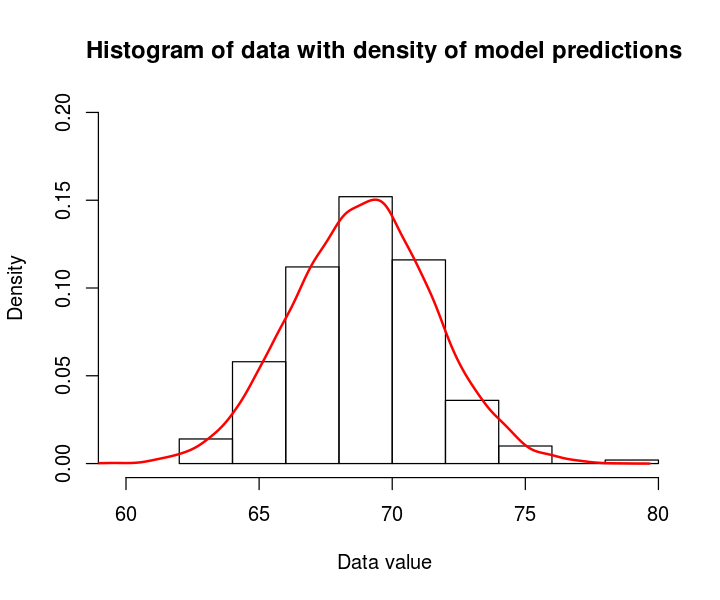

In [29]:
sim_250.vals = sim.height(10000, sigma = 2.616329, p = p, post = post.son_250)

plot.dist(10000, sim_250.vals, male_250$childHeight)

## Summary

In this lesson, you have explored the following concepts:

1. Application of Bayes Theorem.
2. Computation of marginal distribtuions.
3. Selection and computation of prior distributions.
4. Selection and computation of likelihoods.
5. Computation of posterior distributions.
6. Computation and comparison of credible intervals. 
7. Simulation of data values from posterior distribution of model parameters.

![](img/BayesDeNeon.jpg)

#### Copyright 2017 Stephen F Elston. All rights reserved.